In [1]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
#import data
df = pd.read_csv(r'C:\Users\ibrah\Downloads\D3.csv')
df.head(); # To get first n rows from the dataset default value of n is 5
m = len(df)

In [3]:
# set first column to input X
X = df.values[:, 2] 
# set foruth column to output y 
y = df.values[:, 3]

Text(0.5, 1.0, 'X, Y Plot')

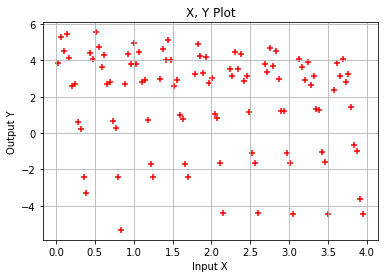

In [4]:
#plot X, Y plot
plt.scatter(X,y, color='red',marker= '+') 
plt.grid() 
plt.rcParams["figure.figsize"] = (10,6) 
plt.xlabel('Input X') 
plt.ylabel('Output Y') 
plt.title('X, Y Plot') 

In [5]:
#ADD vector of ones to represent X0 values
X_0 = np.ones((m, 1))
X_1 = X.reshape(m, 1)
X = np.hstack((X_0, X_1)) 

In [6]:
 """ 
      Function to compute loss

      Input Parameters: 
      ---------------- 
      X : mxn array (m = number of training examples; n= number of features).
      y : 1xm array with answer value to the training examples.
      theta : 1xn array of fitting weights.

      Output Parameters 
      ----------------- 
      J : the loss - scalar value. 
""" 
def compute_loss(X, y, theta): 

    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors) 
    return J 

In [7]:
""" 
  Function to  loss for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : mxn array (m = number of training examples; n= number of features).
  y : 1xm array with answer value to the training examples.
  theta : 1xn array of fitting weights.
  alpha : Learning rate - Scalar value. 
  iterations: No of iterations - Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : 1xn array of final fitting weights
  cost_history: m x 1 array of loss values of each iteration
  """ 
def gradient_descent(X, y, theta, alpha, iterations): 
  loss_history = np.zeros(iterations) 
 
  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / m) * X.transpose().dot(errors); 
    theta = theta - sum_delta; 
    loss_history[i] = compute_loss(X, y, theta)   
 
  return theta, loss_history 

In [8]:
#declare parameters with initial values
theta = [0., 0.] 
iterations = 1200; 
alpha = 0.1; 

In [9]:
#run gradient descent
theta, loss_history = gradient_descent(X, y, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('loss_history =', loss_history) 
print('Final Loss =', loss_history[-1])

Final value of theta = [ 2.8714221  -0.52048288]
loss_history = [4.66843939 4.49602325 4.43685075 ... 3.62945112 3.62945112 3.62945112]
Final Loss = 3.629451124607915


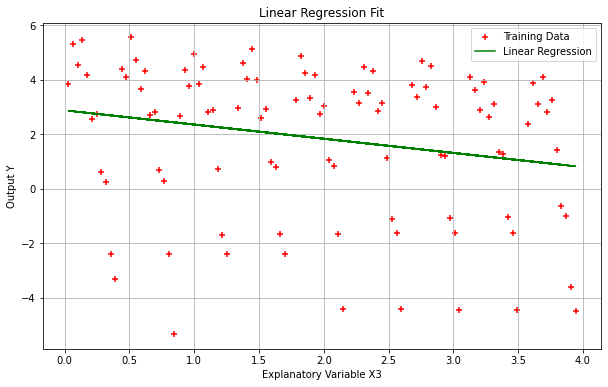

In [10]:
#plot
#take values from column 1 of X
plt.scatter(X[:,1], y, color='red', marker= '+', label= 'Training Data') 
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression') 
 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Explanatory Variable X3') 
plt.ylabel('Output Y') 
plt.title('Linear Regression Fit') 
plt.legend() 

Text(0.5, 1.0, 'Convergence of gradient descent, X3')

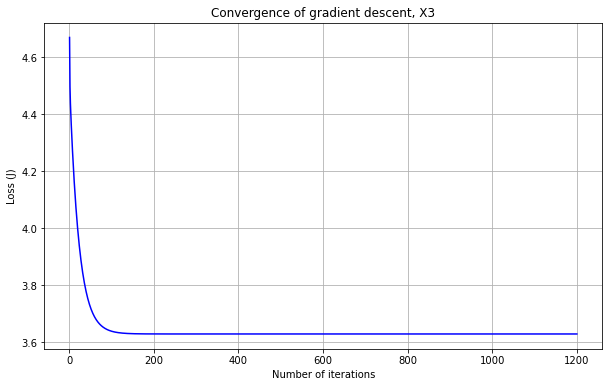

In [11]:
#plot
plt.plot(range(1, iterations + 1),loss_history, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss (J)') 
plt.title('Convergence of gradient descent, X3') 